In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')
import statsmodels

In [ ]:
# Punktem wejściowym była przygotowana ramka danych z 
# poprzednich części projektu, która zawiera tylko wartości numeryczne 
# i binarne, więc jest gotowa do trenowania modeli

In [29]:
data = pd.read_csv("cancer.csv")
df = data.copy()
print(df.head())

   Age  Passive_Smoker  Family_History  Lung_Cancer_Diagnosis  \
0   80               0               0                      0   
1   53               1               0                      0   
2   47               1               0                      0   
3   39               0               1                      0   
4   44               1               0                      0   

   Air_Pollution_Exposure  Occupational_Exposure  Indoor_Pollution  \
0                       0                      1                 0   
1                       0                      1                 0   
2                       1                      0                 0   
3                       0                      0                 0   
4                       1                      1                 0   

   Early_Detection  Annual_Lung_Cancer_Deaths  Lung_Cancer_Prevalence_Rate  \
0                0                     690000                         2.44   
1                0              

In [ ]:
#Rozdzieliłyśmy data frame na kolumnę wartości której
#chcemy przewidzieć i na pozostałe kolumny

#Rozdzieliłyśmy dane na 80% zbioru treningowego i 20% testowego 

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Lung_Cancer_Diagnosis', axis=1)
y = df['Lung_Cancer_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Testowanie podstwowych modeli Logistic Regression i Random Forest
#na przygotowanych zbiorach

#W wyniku widzimy dobre i duże wartości accuracy, ale 
#bardzo małe w procision, recall i f1-score,
#co świadczy o tym że dane są bardzo niezbalansowane

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)  # pos_label=1 to "rak", zmień jeśli inaczej
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print(f" {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Czułość): {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Classification report:\n", classification_report(y_test, y_pred, target_names=['Yes', 'No']))


 Logistic Regression
Accuracy:  0.7143
Precision: 0.0702
Recall (Czułość): 0.4796
F1-score:  0.1225
Classification report:
               precision    recall  f1-score   support

         Yes       0.97      0.72      0.83     42292
          No       0.07      0.48      0.12      1835

    accuracy                           0.71     44127
   macro avg       0.52      0.60      0.48     44127
weighted avg       0.93      0.71      0.80     44127

 Random Forest
Accuracy:  0.9582
Precision: 0.0000
Recall (Czułość): 0.0000
F1-score:  0.0000
Classification report:
               precision    recall  f1-score   support

         Yes       0.96      1.00      0.98     42292
          No       0.00      0.00      0.00      1835

    accuracy                           0.96     44127
   macro avg       0.48      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [ ]:
# Accuracy nie daje nic, bo zbiór jest bardzo źle zbalansowany, ok. 21:1

In [ ]:
# Użycie metody SMOTE do oversamplingu klasy mniejszościowej.
# w celu zapobiegania problemowi niezbalansowanej klasyfikacji i
# sprawdzenie czy to polepszyło wynik w modelu LogisticRegression a potem w Random Forest

# W wyniku to znacząco nie polepszyło predykcje raka

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.689600471366737
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.81     42335
           1       0.04      0.32      0.08      1792

    accuracy                           0.69     44127
   macro avg       0.50      0.51      0.45     44127
weighted avg       0.92      0.69      0.78     44127



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_res, y_res)

y_proba = model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= 0.3).astype(int)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8587259500985791
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     42335
           1       0.05      0.15      0.08      1792

    accuracy                           0.86     44127
   macro avg       0.51      0.52      0.50     44127
weighted avg       0.92      0.86      0.89     44127



In [15]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     42335
           1       0.07      0.41      0.12      1792

    accuracy                           0.74     44127
   macro avg       0.52      0.59      0.48     44127
weighted avg       0.93      0.74      0.82     44127

[[32103 10232]
 [ 1052   740]]
ROC AUC: 0.6151


In [ ]:
# wizualizacja tego jak zmienia się precision w zależności od recall dla róznych progów decyzyjnych modelu
# widzimy Precision szybko spada w miarę jak recall rośnie,
# czyli model łapie dużo przypadków, ale wtedy traci na precyzji co powoduje więcej błędnych alarmów.
# Ogólnie niska precyzja, co sugeruje, że model często błędnie klasyfikuje negatywne przypadki jako pozytywne
# co potwierdza że klasy pozytywne są rzadkie

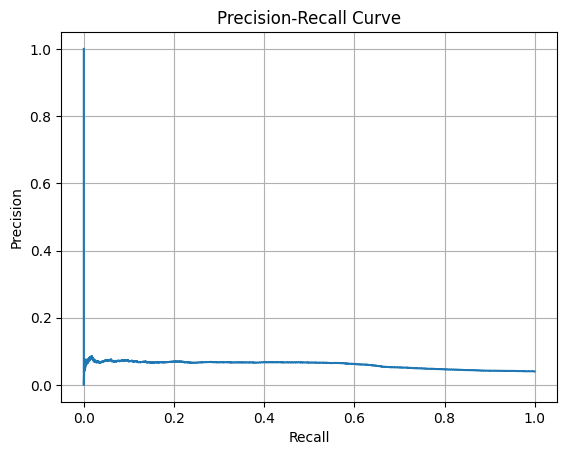

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

In [ ]:
#Przeprowadzono 5-krotną walidację krzyżową (StratifiedKFold) na modelu RandomForestClassifier, 
#oceniając skuteczność za pomocą F1-score.
#Wynik oznacza, że model RandomForestClassifier kompletnie nie rozpoznaje klasy pozytywnej w żadnym podanym wypadku

In [41]:
# cross-validation 

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score


model = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring="f1")  # F1-score przy nierównych klasach

print("F1-scores:", scores)
print("Średnia F1:", scores.mean())

F1-scores: [0. 0. 0. 0. 0.]
Średnia F1: 0.0


In [ ]:
#Próba i ocena, jak zmiana progu (threshold) wpływa na skuteczność klasyfikacji oraz dokładniejsza analiza błędów modelu.
#Widzimy że model prawie zawsze znajduje przypadki 1, ale przy ogromnej liczbie fałszywych alarmów

In [22]:
# ustawiamy thresholdy
custom_threshold = 0.5

y_pred_custom = (y_proba > custom_threshold).astype(int)


print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))


roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.16      0.27     42335
           1       0.04      0.89      0.08      1792

    accuracy                           0.18     44127
   macro avg       0.51      0.52      0.17     44127
weighted avg       0.93      0.18      0.26     44127


Confusion Matrix:
[[ 6567 35768]
 [  203  1589]]
ROC AUC: 0.6151


In [ ]:
#znalezienie najlepszego zestawu parametrów dla modelu XGBoost przy uwzględnieniu niezbalansowanych danych i poprawa skuteczności klasyfikacji

In [33]:
from sklearn.utils import resample

X_train_small, y_train_small = resample(X_train, y_train, n_samples=int(len(X_train) * 0.1), random_state=42)

# parametry
param_grid = {
    'max_depth': [4,5,3],
    'learning_rate':[0.005,0.1,0.05],
    'min_child_weight': [0.5,1,2],
    'n_estimators': [200,100,500]
}

# GridSearchCV
grid_search = GridSearchCV(XGBClassifier(scale_pos_weight=21), param_grid, cv=10, scoring='precision')
# tuning na mniejszym zbiorze danych
grid_search.fit(X_train_small, y_train_small)

print("Najlepsze parametry:", grid_search.best_params_)

model_best = grid_search.best_estimator_

# Predykcje
y_proba = model_best.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba > 0.55).astype(int)

# Ocena wyników
print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

Najlepsze parametry: {'learning_rate': 0.005, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     42335
           1       0.07      0.39      0.11      1792

    accuracy                           0.76     44127
   macro avg       0.52      0.58      0.49     44127
weighted avg       0.93      0.76      0.83     44127

[[32620  9715]
 [ 1091   701]]
ROC AUC: 0.6461


In [28]:
# Testowanie różnych progów decyzyjnych
thresholds = [0.6, 0.5,0.4]

for threshold in thresholds:
    y_pred_custom = (y_proba > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_custom))
    print(confusion_matrix(y_test, y_pred_custom))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}\n")

Threshold: 0.6
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     42335
           1       0.07      0.18      0.10      1792

    accuracy                           0.87     44127
   macro avg       0.52      0.54      0.51     44127
weighted avg       0.93      0.87      0.89     44127

[[37984  4351]
 [ 1477   315]]
ROC AUC: 0.6402

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     42335
           1       0.07      0.52      0.12      1792

    accuracy                           0.69     44127
   macro avg       0.52      0.61      0.46     44127
weighted avg       0.93      0.69      0.78     44127

[[29404 12931]
 [  862   930]]
ROC AUC: 0.6402

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.98      0.59      0.73     42335
           1       0.06      0.67      0.12      1792

    accuracy                           0.

In [ ]:
# Celem predykcji jest diagnoza raka, 
# powinnyśmy się skupić na tym, aby znaleźć wszystkie osoby z rakiem kosztem fałszywej diagnozy
# czyli recall powinien byc wysoki kosztem precision

In [ ]:
#resampling zmieniam stosunek

In [33]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Podziel cechy i etykiety
X = df.drop('Lung_Cancer_Diagnosis', axis=1)
y = df['Lung_Cancer_Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_0_count = y_train.value_counts()[0]
class_1_count = y_train.value_counts()[1]

# zmiejszamy o polowe ilosc probek
sampling_strategy_class_0 = class_0_count // 2


sampling_strategy_class_1 = class_1_count * 3

class_0_indices = y_train[y_train == 0].index
class_0_resampled_indices = class_0_indices[:sampling_strategy_class_0]  
X_train_resampled = pd.concat([X_train.loc[class_0_resampled_indices], X_train[y_train == 1]])
y_train_resampled = pd.concat([y_train.loc[class_0_resampled_indices], y_train[y_train == 1]])

# SMOTE
smote = SMOTE(sampling_strategy={1: sampling_strategy_class_1}, random_state=42)


X_resampled, y_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)


df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Lung_Cancer_Diagnosis'])], axis=1)

# Sprawdzenie nowego balansu
print(df_resampled['Lung_Cancer_Diagnosis'].value_counts())


Lung_Cancer_Diagnosis
0    84668
1    21507
Name: count, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
     'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42),
    
}

# Trenowanie i ocena
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_resampled, y_resampled)
    
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= 0.3).astype(int)

    print(confusion_matrix(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")
    
    print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression ===
[[36210  6125]
 [ 1432   360]]
ROC AUC: 0.5509
              precision    recall  f1-score   support

           0     0.9620    0.8553    0.9055     42335
           1     0.0555    0.2009    0.0870      1792

    accuracy                         0.8287     44127
   macro avg     0.5087    0.5281    0.4962     44127
weighted avg     0.9251    0.8287    0.8723     44127


=== Random Forest ===
[[36569  5766]
 [ 1441   351]]
ROC AUC: 0.5969
              precision    recall  f1-score   support

           0     0.9621    0.8638    0.9103     42335
           1     0.0574    0.1959    0.0888      1792

    accuracy                         0.8367     44127
   macro avg     0.5097    0.5298    0.4995     44127
weighted avg     0.9253    0.8367    0.8769     44127


=== XGBoost ===
[[36381  5954]
 [ 1422   370]]
ROC AUC: 0.5975
              precision    recall  f1-score   support

           0     0.9624    0.8594    0.9080     42335
           1     0.0585    

In [ ]:
#Widzimy że Logistic Regression, Random Forest, XGBoost utrzymują wysoką accuracy, 
#ale mają niski recall dla klasy pozytywnej (mało wykrywanych przypadków raka).
#LightGBM poprawia recall, ale pogarsza ogólną accuracy.

In [ ]:
# dalej użyto modelu XGBoost na danych zbalansowanych metodą SMOTE.
# Przeprowadzono RandomizedSearchCV na 30 losowych kombinacjach hiperparametrów, 
#skupiając się na maksymalizacji recall (wykrywanie przypadków pozytywnych).

#Najlepsze parametry:
#subsample=0.6, scale_pos_weight=5, n_estimators=300, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=1.0.
#Ostateczne przewidywania wykonano przy progu 0.6.

#Udało się zdecydowanie poprawić recall dla klasy pozytywnej (choroby) względem poprzednich modeli,
#Jednak precision nadal jest bardzo niskie — model generuje dużo fałszywych alarmów.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np


#XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2, 3, 5]  # bardzo ważne dla nierównych danych
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,        # ile kombinacji przetestować
    scoring='recall', # skupiamy się na recall
    cv=3,             # 3-krotna walidacja krzyżowa
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

print("\nNajlepsze parametry znalezione:")
print(random_search.best_params_)

y_proba = best_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.6).astype(int) 

print("\n=== Wyniki na TEST ===")
print(classification_report(y_test, y_pred, digits=4))

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Najlepsze parametry znalezione:
{'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}

=== Wyniki na TEST ===
              precision    recall  f1-score   support

           0     0.9656    0.7642    0.8532     42335
           1     0.0603    0.3571    0.1031      1792

    accuracy                         0.7477     44127
   macro avg     0.5129    0.5607    0.4782     44127
weighted avg     0.9289    0.7477    0.8227     44127



In [ ]:
#Użyto modelu LightGBM na danych zbalansowanych metodą SMOTE
#w wyniku model wykrywa prawie 30% przypadków pozytywnych,
#Precision jest bardzo niskie (wiele fałszywych alarmów),

In [49]:
import lightgbm as lgb
# LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8, -1],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'num_leaves': [20, 31, 40, 50, 70], 
    'scale_pos_weight': [1, 2, 3, 5]   
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,        # ile kombinacji przetestować
    scoring='recall', # skupiamy się na recall
    cv=3,             # 3-krotna walidacja krzyżowa
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

print("\nNajlepsze parametry znalezione:")
print(random_search.best_params_)

y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.6).astype(int)  

print("\n=== Wyniki na TEST ===")
print(classification_report(y_test, y_pred, digits=4))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 21507, number of negative: 84668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 106175, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202562 -> initscore=-1.370359
[LightGBM] [Info] Start training from score -1.370359

Najlepsze parametry znalezione:
{'subsample': 0.9, 'scale_pos_weight': 5, 'num_leaves': 40, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

=== Wyniki na TEST ===
              precision    recall  f1-score   support

           0     0.9639    0.7950    0.8713     42335
           1     0.0577    0.2963    0.0965      1792

    accuracy    

In [ ]:
# kombinacja klasyfikatorow

In [ ]:
# Stworzono ensemble model łączący: najlepszy XGBoost,
# najlepszy LightGBM i najlepszy Random Forest,
# Modele zostały przetrenowane na danych zbalansowanych przy użyciu SMOTE

#recall (31%) jest lepszy niż w pojedynczych modelach XGBoost lub LightGBM osobno,
#accuracy pozostaje na dobrym poziomie (78%),
#precision jest nadal niski (6%), co oznacza dużą liczbę fałszywych alarmów,
# ROC AUC 0.6189 wskazuje, że model umiarkowanie rozróżnia klasy.

In [39]:
from sklearn.ensemble import VotingClassifier
# Najlepszy model XGBoost
xgb_model = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.01, subsample=0.6, 
    scale_pos_weight=5, gamma=0.1, colsample_bytree=1.0, random_state=42
)

# Najlepszy model LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.9, 
    scale_pos_weight=5, random_state=42
)

# Najlepszy model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=6, random_state=42
)

ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    voting='soft'
)

ensemble_model.fit(X_resampled, y_resampled)

y_pred = ensemble_model.predict(X_test)

print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 21507, number of negative: 84668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 106175, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202562 -> initscore=-1.370359
[LightGBM] [Info] Start training from score -1.370359
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     42335
           1       0.06      0.31      0.10      1792

    accuracy                           0.78     44127
   macro avg       0.51      0.55      0.49     44127
weighted avg       0.93      0.78      0.84     44127



In [40]:
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

[[33651  8684]
 [ 1238   554]]
ROC AUC: 0.6189


In [ ]:
# knn neighbors

In [ ]:
#Zastosowano metodę Tomek Links do under-samplingu zbioru treningowego.
#Tomek Links usuwa próbki klasy większościowej
#które są najbliżej klasy mniejszościowej
#dzięki temu czyści granicę klas i zmniejsza nakładanie się danych.

In [41]:
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()

X_train_tl, y_train_tl = tomek_links.fit_resample(X_train, y_train)

from collections import Counter
print('Rozkład przed Tomek Links:', Counter(y_train))
print('Rozkład po Tomek Links:', Counter(y_train_tl))

Rozkład przed Tomek Links: Counter({0: 169336, 1: 7169})
Rozkład po Tomek Links: Counter({0: 165363, 1: 7169})


In [ ]:
#Użyto metody NearMiss do under-samplingu danych po oczyszczeniu Tomek Links.
#NearMiss wybiera próbki klasy większościowej, które są najbliżej próbek klasy mniejszościowej 
#żeby utrzymać trudniejsze przypadki do rozróżnienia.
#Dzięki temu zbiór danych jest bardziej zrównoważony i skupiony na trudnych przykładach

In [42]:
from imblearn.under_sampling import NearMiss

near_miss = NearMiss(version=1)

X_train_nm, y_train_nm = near_miss.fit_resample(X_train_tl, y_train_tl)

print('Rozkład przed NearMiss:', Counter(y_train_tl))
print('Rozkład po NearMiss:', Counter(y_train_nm))

Rozkład przed NearMiss: Counter({0: 165363, 1: 7169})
Rozkład po NearMiss: Counter({0: 7169, 1: 7169})


In [ ]:
#Wytrenowano klasyfikator K-Nearest Neighbors z 100 najbliższymi sąsiadami
#na danych przetworzonych metodami Tomek Links i NearMiss

#Model osiąga średnią dokładność (63%) i dobry recall między klasami (63,5%), ale precision jest niższe (52%).
#F1-score jest umiarkowany, co pokazuje, że równowaga między precyzją a recall jest przeciętna

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto')

knn_model.fit(X_train_nm, y_train_nm)

y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6326285494141909
Precision (macro): 0.5222913310066715
Recall (macro): 0.6345870825705681
F1-score (macro): 0.44550945974843886


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 25, 50, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto']  
}

grid = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='f1_macro',     
    cv=3,                   
    n_jobs=-1,              
    verbose=2               
)

grid_result = grid.fit(X_train_nm, y_train_nm)

print("Best Score (F1-macro): {:.4f}".format(grid_result.best_score_))
print("Best Params:", grid_result.best_params_)

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

print("\nFinal evaluation on TEST set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Score (F1-macro): 0.8497
Best Params: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

Final evaluation on TEST set:
Accuracy: 0.4822897545720307
Precision (macro): 0.518286788239728
Recall (macro): 0.6166246860184076
F1-score (macro): 0.3711925760300885


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')

knn_model.fit(X_train_nm, y_train_nm)

y_pred = knn_model.predict(X_test)

# Ocena
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.4822897545720307
Precision (macro): 0.518286788239728
Recall (macro): 0.6166246860184076
F1-score (macro): 0.3711925760300885


In [ ]:
#Model KNN (n_neighbors=7) osiąga bardzo wysoki i stabilny wynik F1-macro na danych treningowych (po NearMiss),
#Bardzo małe odchylenie standardowe oznacza, że model działa stabilnie w różnych podziałach danych.

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

best_knn_model = KNeighborsClassifier(
    n_neighbors=7,       
    weights='uniform',    
    algorithm='auto'      
)

scores = cross_val_score(
    best_knn_model,
    X_train_nm,
    y_train_nm,
    cv=5,                   
    scoring='f1_macro'
)

print("Cross-validation F1 macro scores:", scores)
print("Średni wynik F1 macro:", scores.mean())
print("Odchylenie standardowe F1 macro:", scores.std())

Cross-validation F1 macro scores: [0.85719191 0.85366767 0.85695598 0.85868772 0.84875406]
Średni wynik F1 macro: 0.85505146912284
Odchylenie standardowe F1 macro: 0.0035497382220818843


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-score:", f1_score(y_test, y_pred, pos_label=1))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Brak raka", "Rak"]))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4822897545720307
Precision: 0.057468365073359395
Recall: 0.7628348214285714
F1-score: 0.10688455373548614
ROC AUC Score: 0.6436861821209232

Classification Report:
               precision    recall  f1-score   support

   Brak raka       0.98      0.47      0.64     42335
         Rak       0.06      0.76      0.11      1792

    accuracy                           0.48     44127
   macro avg       0.52      0.62      0.37     44127
weighted avg       0.94      0.48      0.61     44127


Confusion Matrix:
 [[19915 22420]
 [  425  1367]]


In [ ]:
#widzimy że model bardzo dobrze wykrywa raka (76% recall), ale ogromnym kosztem błędnych alarmów (tylko 5,7% precision) i spadku ogólnej dokładności

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np

models = {
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto'),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

print("\n=== Wyniki CROSS-VALIDATION (5-fold) ===")
for name, model in models.items():
    scores = cross_val_score(model, X_train_nm, y_train_nm, cv=5, scoring='f1_macro', n_jobs=-1)
    print(f"{name}: F1_macro = {scores.mean():.4f} +/- {scores.std():.4f}")

print("\n=== Wyniki na TEST SEKCIE ===")
for name, model in models.items():
    model.fit(X_train_nm, y_train_nm)
    y_pred_test = model.predict(X_test)
    print(f"\n{name} - Test Set Metrics:")
    print(classification_report(y_test, y_pred_test, digits=4))


=== Wyniki CROSS-VALIDATION (5-fold) ===
KNN: F1_macro = 0.8551 +/- 0.0035
LightGBM: F1_macro = 0.8740 +/- 0.0112
XGBoost: F1_macro = 0.8671 +/- 0.0125

=== Wyniki na TEST SEKCIE ===

KNN - Test Set Metrics:
              precision    recall  f1-score   support

           0     0.9791    0.4704    0.6355     42335
           1     0.0575    0.7628    0.1069      1792

    accuracy                         0.4823     44127
   macro avg     0.5183    0.6166    0.3712     44127
weighted avg     0.9417    0.4823    0.6140     44127

[LightGBM] [Info] Number of positive: 7169, number of negative: 7169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 14338, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: 

In [ ]:
#Wszystkie modele skutecznie wykrywają większość przypadków raka (wysoki recall), 
#ale kosztem niskiej precyzji i spadku ogólnej dokładności. KNN najlepiej balansuje wyniki na zbiorze testowym

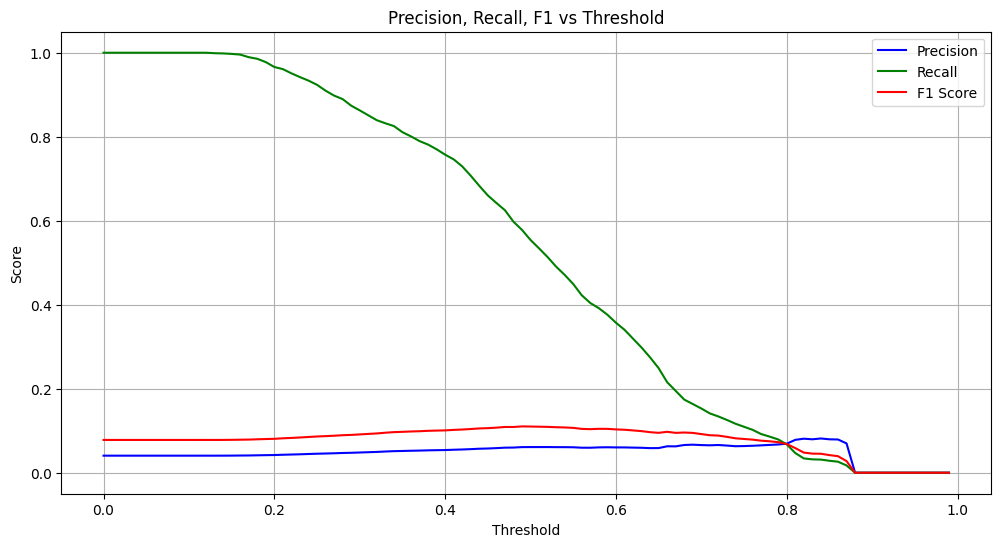

Najlepszy threshold (dla maksymalnego F1): 0.49
Precision przy tym threshold: 0.0610
Recall przy tym threshold: 0.5781
F1 przy tym threshold: 0.1103


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

y_proba = best_model.predict_proba(X_test)[:,1]

# rozne thresholdy
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []
f1s = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))

plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions, label="Precision", color='blue')
plt.plot(thresholds, recalls, label="Recall", color='green')
plt.plot(thresholds, f1s, label="F1 Score", color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

best_threshold = thresholds[np.argmax(f1s)]
print(f"Najlepszy threshold (dla maksymalnego F1): {best_threshold:.2f}")
print(f"Precision przy tym threshold: {precisions[np.argmax(f1s)]:.4f}")
print(f"Recall przy tym threshold: {recalls[np.argmax(f1s)]:.4f}")
print(f"F1 przy tym threshold: {max(f1s):.4f}")

#Wniosek
#W projekcie przeprowadzono kompleksową analizę różnych modeli klasyfikacyjnych, 
#których zadaniem było wykrywanie rzadkiej klasy pozytywnej (rak płuc) w bardzo niezbalansowanych danych.
#W celu poprawy wyników stosowano techniki balansowania danych: SMOTE, Tomek Links, NearMiss, 
#oraz strojenie hiperparametrów za pomocą GridSearchCV i RandomizedSearchCV

#Testowane modele: K-Nearest Neighbors, Random Forest, XGBoost, LightGBM, Voting Ensemble (XGBoost + LightGBM + Random Forest), LogisticRegression

#KNN po balansowaniu danymi (Tomek Links + NearMiss) okazał się najlepszym modelem w praktycznym rozpoznawaniu raka w testowym zbiorze danych.
#Modele zespołowe (LightGBM, XGBoost, VotingClassifier) zrobiły nieco wyższy recall, ale jeszcze niższą precision i spadek accuracy.

#Podsumowując, w przypadku tego problemu, gdzie nadrzędnym celem jest wykrycie jak największej liczby przypadków raka, 
#model KNN po NearMiss jest najbardziej efektywnym rozwiązaniem